In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

__Завдання__:
1. У цьому завданні вам потрібно завантажити ось цей датасет. Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

1. Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоримтом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

In [2]:
df_2d = pd.read_csv(os.getcwd()+'\data\data_2d.csv', header=None)
print(f"Shape df_2d:{np.array(df_2d).shape}")
df_2d.head()

Shape df_2d:(200, 3)


,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218


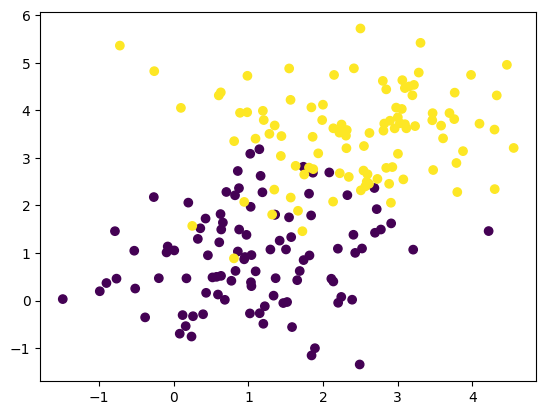

In [3]:
plt.scatter(df_2d[1], df_2d[2], c=df_2d[0])

In [4]:
y_2d = df_2d[0]
X_2d = df_2d.drop([0], axis=1)
X_2d_norm = StandardScaler().fit_transform(X_2d)
pd.DataFrame(X_2d_norm).describe()

,0,1
count,2.000000e+02,2.000000e+02
mean,-1.065814e-16,-7.105427e-17
std,1.002509e+00,1.002509e+00
min,-2.625806e+00,-2.220670e+00
25%,-7.150476e-01,-7.846139e-01
50%,-2.355317e-02,4.458579e-02
75%,7.620883e-01,8.685911e-01
max,2.260294e+00,2.192492e+00


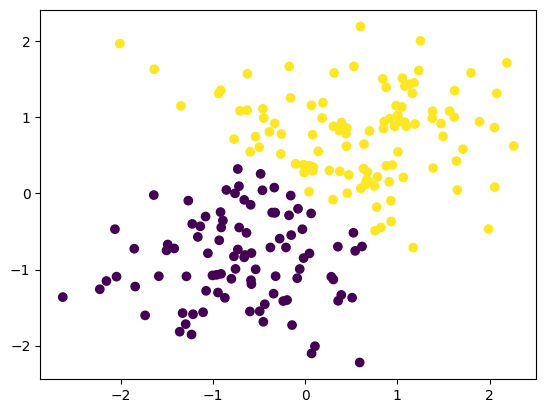

In [5]:
kmeans = KMeans(n_clusters=2, n_init="auto").fit(X_2d_norm)
plt.scatter(X_2d_norm[:, 0], X_2d_norm[:, 1], c=kmeans.labels_)

In [6]:
adjusted_rand_score(y_2d, kmeans.labels_)

0.6064293780517122

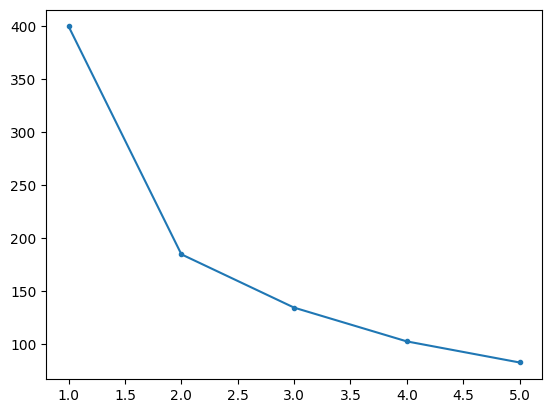

In [9]:
cost = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, n_init="auto").fit(X_2d_norm)
    cost.append(kmeans.inertia_)
plt.plot(range(1, 6), cost, marker=".")

Оптимальна кількість кластерів n = 2 згідно ліктевого методу. Точність методу = 0.606

In [10]:
df_mnist = pd.read_csv(os.getcwd()+'\data\mnist.csv', header=None)
print(f"Shape df_minst:{np.array(df_mnist).shape}")
df_mnist.head()

Shape df_minst:(500, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X_minst_norm = StandardScaler().fit_transform(df_mnist)
X_pca = PCA(n_components=2).fit_transform(X_minst_norm)
pd.DataFrame(X_pca).describe()

,0,1
count,5.000000e+02,5.000000e+02
mean,2.700062e-16,4.263256e-16
std,6.489444e+00,5.425755e+00
min,-9.054682e+00,-1.246807e+01
25%,-4.573748e+00,-4.061314e+00
50%,-1.256772e+00,-9.837666e-01
75%,2.957383e+00,3.611071e+00
max,2.664519e+01,1.569461e+01


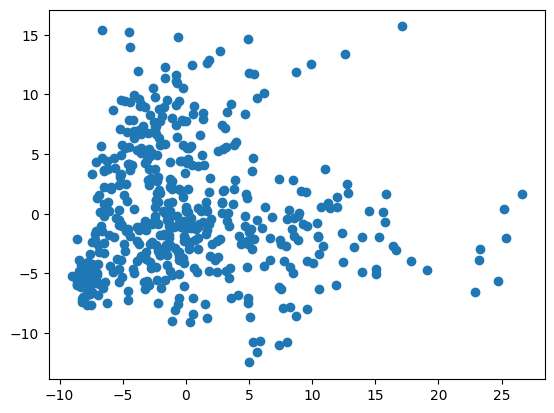

In [12]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])

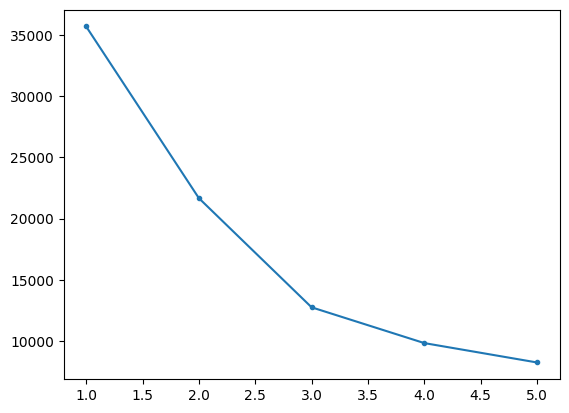

In [13]:
cost = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, n_init="auto").fit(X_pca)
    cost.append(kmeans.inertia_)
plt.plot(range(1, 6), cost, marker=".")

Оптимальна кількість кластерів n = 3 згідно ліктевого методу.

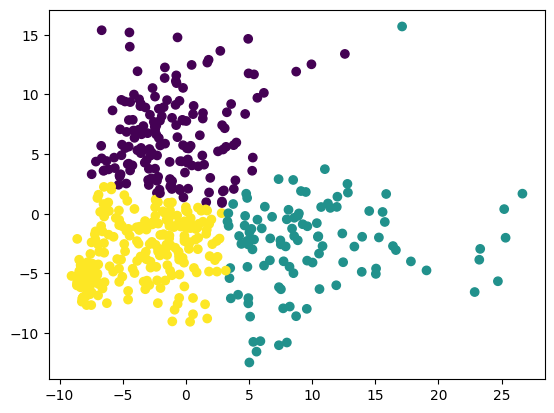

In [14]:
kmeans_mnist = KMeans(n_clusters=3, n_init="auto").fit(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_mnist.labels_)

При розподіленні на кластери весь датасет мав форму трикутника що і показав ліктевий метод.